In [1]:
import nibabel as nib
#from monai.transforms import Compose, LoadImaged, AddChanneld, ToTensord
from monai.inferers import sliding_window_inference
from monai.networks.nets import UNet
from monai.data import Dataset, DataLoader
import torch

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt


image_path = 'conform_input.nii.gz'
label_path = 'dnn_label.nii.gz'

image_nii = nib.load(image_path)
label_nii = nib.load(label_path)


image_data = image_nii.get_fdata()
label_data = label_nii.get_fdata()


hippocampus_labels = [14, 28]

In [4]:


# 오버레이를 위해 두 개의 히포캠퍼스 레이블을 추출
hippocampus_data = np.isin(label_data, hippocampus_labels).astype(np.float32)


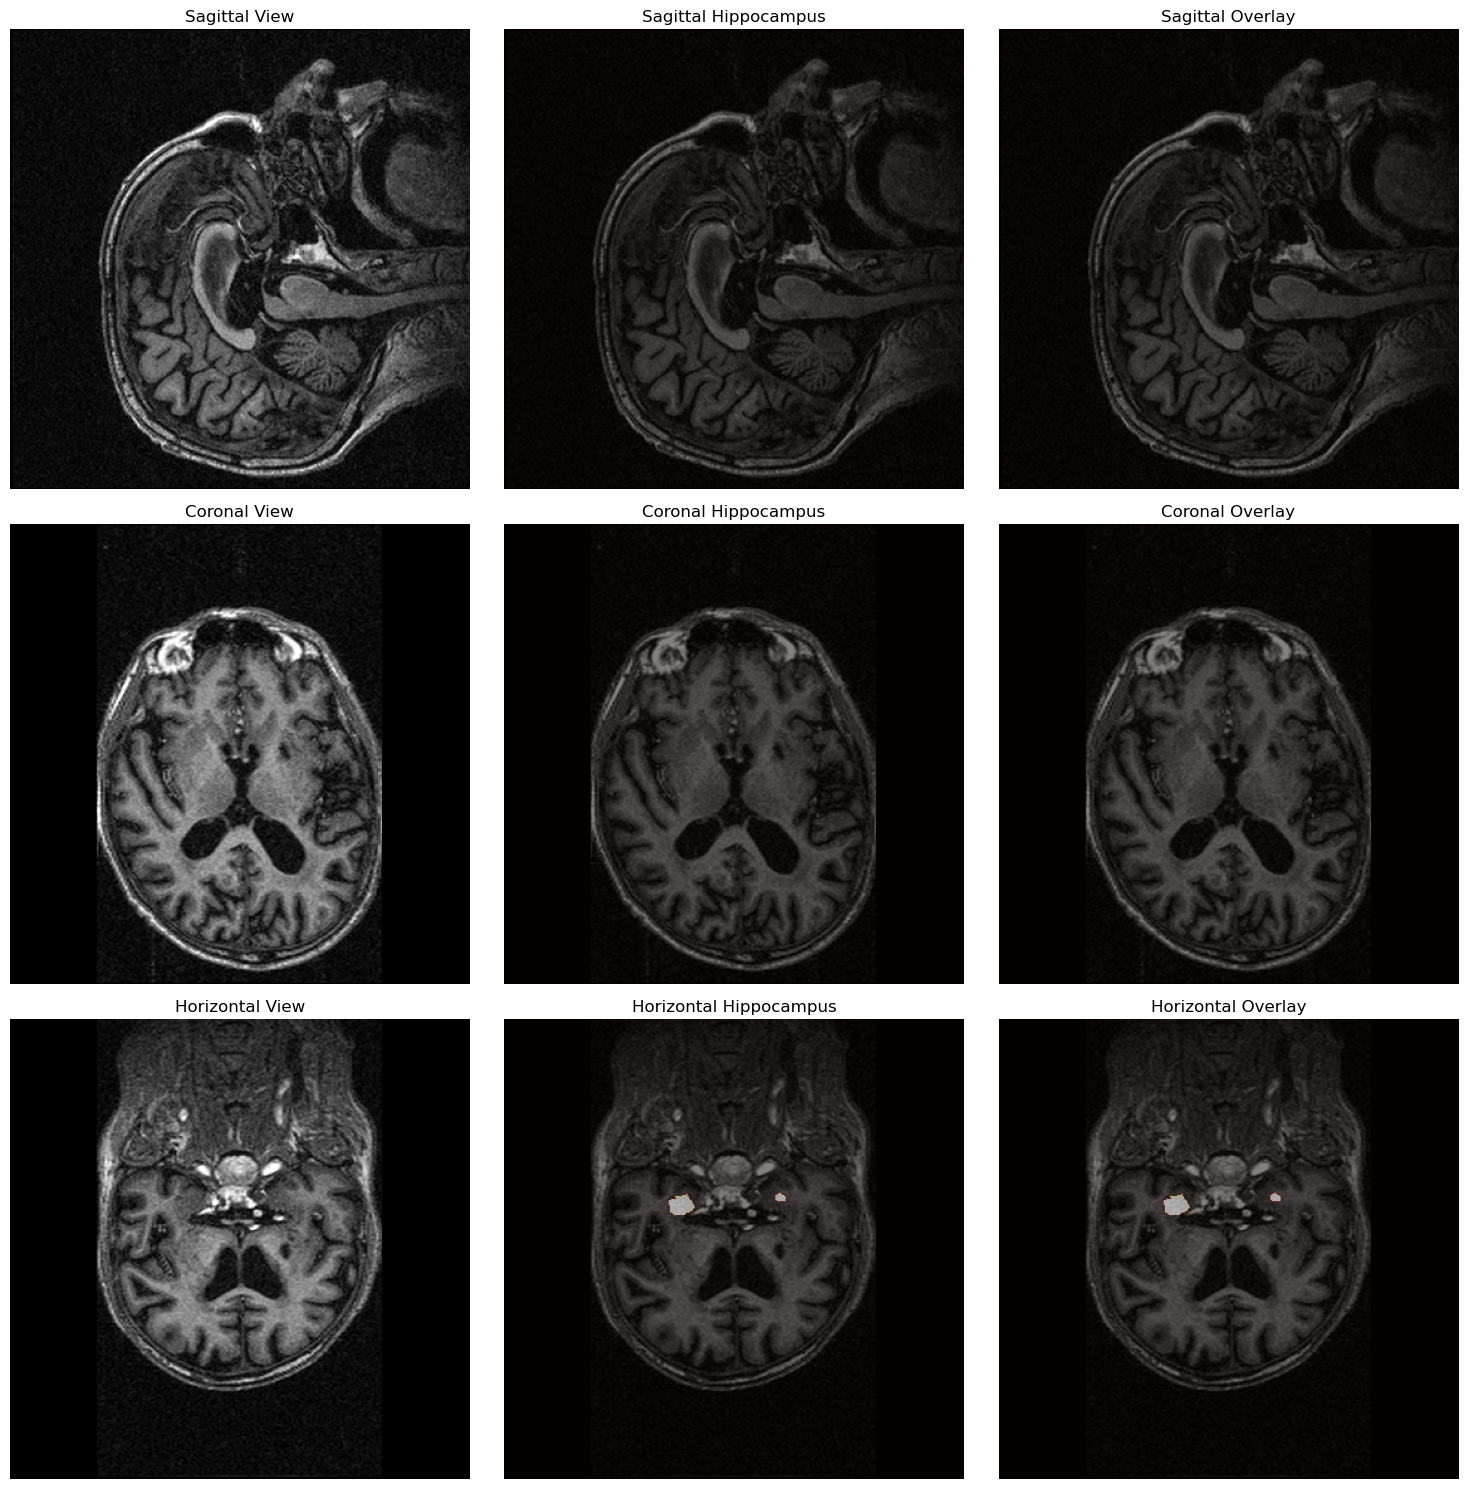

In [5]:
# Sagittal, Coronal, Horizontal 방향에 대한 중앙 슬라이스 인덱스 계산
sagittal_slice_idx = image_data.shape[0] // 2
coronal_slice_idx = image_data.shape[1] // 2
horizontal_slice_idx = image_data.shape[2] // 2

# 방향별 슬라이스 추출
sagittal_image_slice = image_data[sagittal_slice_idx, :, :]
coronal_image_slice = image_data[:, coronal_slice_idx, :]
horizontal_image_slice = image_data[:, :, horizontal_slice_idx]

sagittal_hippocampus_slice = hippocampus_data[sagittal_slice_idx, :, :]
coronal_hippocampus_slice = hippocampus_data[:, coronal_slice_idx, :]
horizontal_hippocampus_slice = hippocampus_data[:, :, horizontal_slice_idx]

# 시각화
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Sagittal 방향 시각화
axes[0, 0].imshow(sagittal_image_slice.T, cmap='gray', origin='lower')
axes[0, 0].set_title('Sagittal View')
axes[0, 0].axis('off')

axes[0, 1].imshow(sagittal_image_slice.T, cmap='gray', origin='lower')
axes[0, 1].imshow(sagittal_hippocampus_slice.T, cmap='hot', alpha=0.5, origin='lower')
axes[0, 1].set_title('Sagittal Hippocampus')
axes[0, 1].axis('off')

axes[0, 2].imshow(sagittal_image_slice.T, cmap='gray', origin='lower')
axes[0, 2].imshow(sagittal_hippocampus_slice.T, cmap='hot', alpha=0.5, origin='lower')
axes[0, 2].set_title('Sagittal Overlay')
axes[0, 2].axis('off')

# Coronal 방향 시각화
axes[1, 0].imshow(coronal_image_slice.T, cmap='gray', origin='lower')
axes[1, 0].set_title('Coronal View')
axes[1, 0].axis('off')

axes[1, 1].imshow(coronal_image_slice.T, cmap='gray', origin='lower')
axes[1, 1].imshow(coronal_hippocampus_slice.T, cmap='hot', alpha=0.5, origin='lower')
axes[1, 1].set_title('Coronal Hippocampus')
axes[1, 1].axis('off')

axes[1, 2].imshow(coronal_image_slice.T, cmap='gray', origin='lower')
axes[1, 2].imshow(coronal_hippocampus_slice.T, cmap='hot', alpha=0.5, origin='lower')
axes[1, 2].set_title('Coronal Overlay')
axes[1, 2].axis('off')

# Horizontal 방향 시각화
axes[2, 0].imshow(horizontal_image_slice.T, cmap='gray', origin='lower')
axes[2, 0].set_title('Horizontal View')
axes[2, 0].axis('off')

axes[2, 1].imshow(horizontal_image_slice.T, cmap='gray', origin='lower')
axes[2, 1].imshow(horizontal_hippocampus_slice.T, cmap='hot', alpha=0.5, origin='lower')
axes[2, 1].set_title('Horizontal Hippocampus')
axes[2, 1].axis('off')

axes[2, 2].imshow(horizontal_image_slice.T, cmap='gray', origin='lower')
axes[2, 2].imshow(horizontal_hippocampus_slice.T, cmap='hot', alpha=0.5, origin='lower')
axes[2, 2].set_title('Horizontal Overlay')
axes[2, 2].axis('off')

plt.tight_layout()
plt.show()